In [2]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import vegas
import random as rand

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e

def diff_decay(s, t, ml, v, CW, SW, x):
    N = e ** 2 / (8 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = ml ** 2 * (m_h ** 4 + s ** 2) / (v ** 2 * (t * u))
    struc_6 = ((2 * 2 ** 0.5 * m_h ** 2) / e) * (x * 10 ** (-6)) * (SW - CW)
    struc_8 = ((2 * t * u * v ** 2) / (ml ** 2 * e ** 2)) * (x ** 2 * 10 ** (-12)) * (SW - CW) ** 2
    return [struc_4, struc_6, struc_8]

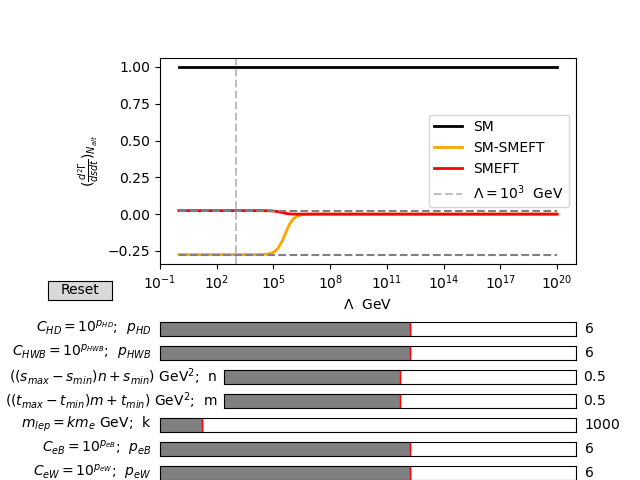

In [19]:
def SM_decay(n, m, v, k_ml, p_HD, p_HWB, cos, sin, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    C_HD = 10 ** p_HD
    C_HWB = 10 ** p_HWB
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return diff_decay(s_pick, t_pick, ml, v_alt, cos, sin, x)[0]

def SMEFT_decay(n, m, v, k_ml, p_HD, p_HWB, cos, sin, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    C_HD = 10 ** p_HD
    C_HWB = 10 ** p_HWB
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return diff_decay(s_pick, t_pick, ml, v_alt, cos, sin, x)[2]

def SM_SMEFT_decay(n, m, v, k_ml, p_HD, p_HWB, cos, sin, x):
    ml = k_ml * m_e
    s_min_fix = 4 * ml ** 2 
    s_max_fix = m_h ** 2 
    t_min_fix = ml ** 2
    t_max_fix = (m_h - ml) ** 2
    s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
    t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
    C_HD = 10 ** p_HD
    C_HWB = 10 ** p_HWB
    v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
    return diff_decay(s_pick, t_pick, ml, v_alt, cos, sin, x)[1]

init_p_HD = 6
init_p_HWB = 6
init_n = 0.5
init_m = 0.5
init_k_ml = 1000
Lambdas = np.logspace(0,20,100)
Lambda_fix = 10 ** 3

fig, ax = plt.subplots()
line, = ax.plot(Lambdas, SM_decay(init_n, init_m, v, init_k_ml, init_p_HD, init_p_HWB, cos, sin, init_p_eB, init_p_eW, Lambdas), lw=2, color = 'black', label = 'SM')
line6, = ax.plot(Lambdas, SM_SMEFT_decay(init_n, init_m, v, init_k_ml, init_p_HD, init_p_HWB, cos, sin, init_p_eB, init_p_eW, Lambdas), lw=2, color = 'orange', label = 'SM-SMEFT')
line8, = ax.plot(Lambdas, SMEFT_decay(init_n, init_m, v, init_k_ml, init_p_HD, init_p_HWB, cos, sin, init_p_eB, init_p_eW, Lambdas), lw=2, color = 'red', label = 'SMEFT')
lineh6, = ax.plot(Lambdas, np.array(len(Lambdas) * [SM_SMEFT_decay(init_n, init_m, v, init_k_ml, init_p_HD, init_p_HWB, cos, sin, init_p_eB, init_p_eW, Lambda_fix)]), color = 'grey', linestyle = '--', label='')
lineh8, = ax.plot(Lambdas, np.array(len(Lambdas) * [SMEFT_decay(init_n, init_m, v, init_k_ml, init_p_HD, init_p_HWB, cos, sin, init_p_eB, init_p_eW, Lambda_fix)]), color = 'grey', linestyle = '--', label='')
plt.axvline(x=Lambda_fix, linestyle = '--', color = 'grey', alpha = 0.5, label = r'$\Lambda = '+str(10)+'^{3}$  GeV')
plt.xscale('log')
#plt.yscale('symlog')
ax.set_xlabel('$\Lambda$  GeV')
ax.set_ylabel(r'$(\frac{d^{2}\Gamma}{dsdt})_{N_{alt}}$')
plt.legend()

fig.subplots_adjust(left=0.25, bottom=0.45)

ax_p_HD = fig.add_axes([0.25, 0.3, 0.65, 0.03])
p_HD_slider = Slider(
    ax=ax_p_HD,
    label=r'$C_{HD}=10^{p_{HD}}$;  $p_{HD}$',
    valmin=-30,
    valmax=30,
    valinit=init_p_HD,
    color = 'gray')

ax_p_HWB = fig.add_axes([0.25, 0.25, 0.65, 0.03])
p_HWB_slider = Slider(
    ax=ax_p_HWB,
    label=r'$C_{HWB}=10^{p_{HWB}}$;  $p_{HWB}$',
    valmin=-30,
    valmax=30,
    valinit=init_p_HWB,
    color = 'gray')

axs = fig.add_axes([0.35, 0.2, 0.55, 0.03])
n_slider = Slider(
    ax=axs,
    label=r'$((s_{max} - s_{min})n + s_{min})$ GeV$^{2}$;  n',
    valmin=0,
    valmax=1,
    valinit=init_n,
    color = 'gray')

axt = fig.add_axes([0.35, 0.15, 0.55, 0.03])
m_slider = Slider(
    ax=axt,
    label=r'$((t_{max} - t_{min})m + t_{min})$ GeV$^{2}$;  m',
    valmin=0,
    valmax=1,
    valinit=init_m,
    color = 'gray')

axml = fig.add_axes([0.25, 0.1, 0.65, 0.03])
k_ml_slider = Slider(
    ax=axml,
    label=r'$m_{lep} = k m_{e}$ GeV;  k',
    valmin=1,
    valmax=10000,
    valinit=init_k_ml,
    color = 'gray')

ax_C_eB = fig.add_axes([0.25, 0.05, 0.65, 0.03])
p_eB_slider = Slider(
    ax=ax_C_eB,
    label=r'$C_{eB} = 10^{p_{eB}}$;  $p_{eB}$',
    valmin=-30,
    valmax=30,
    valinit=init_p_eB,
    color = 'gray')

ax_C_eW = fig.add_axes([0.25, 0.0, 0.65, 0.03])
p_eW_slider = Slider(
    ax=ax_C_eW,
    label=r'$C_{eW} = 10^{p_{eW}}$;  $p_{eW}$',
    valmin=-30,
    valmax=30,
    valinit=init_p_eW,
    color = 'gray')

def update(val):
    line.set_ydata(SM_decay(n_slider.val, m_slider.val, v, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, Lambdas))
    line6.set_ydata(SM_SMEFT_decay(n_slider.val, m_slider.val, v, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, Lambdas))
    line8.set_ydata(SMEFT_decay(n_slider.val, m_slider.val, v, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, Lambdas))
    lineh6.set_ydata(np.array(len(Lambdas) * [SM_SMEFT_decay(n_slider.val, m_slider.val, v, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, Lambda_fix)]))
    lineh8.set_ydata(np.array(len(Lambdas) * [SMEFT_decay(n_slider.val, m_slider.val, v, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, Lambda_fix)]))
    #val8.set_ydata(SMEFT_decay((n_slider.val, m_slider.val, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, 10**3)))
    #val6.set_ydata(SM_SMEFT_decay((n_slider.val, m_slider.val, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, 10**3)))
    #val4.set_ydata(SM_decay((n_slider.val, m_slider.val, k_ml_slider.val, p_HD_slider.val, p_HWB_slider.val, cos, sin, p_eB_slider.val, p_eW_slider.val, 10**3)))                           
    #line1.set_ydata(SM_decay(n_slider.val, m_slider.val, k_ml_slider.val, -np.inf, -np.inf, cos, sin, -np.inf, -np.inf, Lambdas))
    fig.canvas.draw_idle()

p_HD_slider.on_changed(update)
p_HWB_slider.on_changed(update)
n_slider.on_changed(update)
m_slider.on_changed(update)
k_ml_slider.on_changed(update)
p_eB_slider.on_changed(update)
p_eW_slider.on_changed(update)

resetax = fig.add_axes([0.075, 0.375, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    p_HD_slider.reset()
    p_HWB_slider.reset()
    n_slider.reset()
    m_slider.reset()
    k_ml_slider.reset()
    p_eB_slider.reset()
    p_eW_slider.reset()
button.on_clicked(reset)
plt.show()

In [21]:
v, sin, cos, sin - cos, e, m_m, m_h ** 2

(246.21948395467186,
 0.472242761010461,
 0.8814685330022942,
 -0.40922577199183324,
 0.3083297899710313,
 0.10566,
 15650.009999999998)

In [27]:
ml = m_m
n = 0.5
m = 0.5
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s = (s_max_fix - s_min_fix) * n + s_min_fix
t = (t_max_fix - t_min_fix) * m + t_min_fix
u = m_h ** 2 + 2 * ml ** 2 - s - t

In [28]:
s, t, u, t*u

(7825.027328071199, 7811.798098035599, 13.206901964400458, 103169.65164644612)

In [17]:
Lambda = 10 ** 3
C_HWB = 10 ** 2
C_HD = C_HWB

v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))

13.99273237249504